# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
import csv
import random
from collections import Counter
from utils.textnormalization import TextNormalization
from utils.machinelearning import machine_learning_model, fit_model, metrics_values, confusion_matrix_
from utils.deeplearning import convolutional_neural_network_1d, model_compile, model_fit, evaluate, plot_accuracy_loss, lstm_, gru_
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import go_figure , bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
random.seed(40)
tf.random.set_seed(40)

/Users/osamaanmar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
Train = pd.read_csv('train.csv')
Train.rename(columns={'text': 'Review', 'sentiment': 'Sentiment'}, inplace=True)
Train['Sentiment'] = Train['Sentiment'].map({'neg': 'Negative', 'pos': 'Positive'})
Train.head(5)

,Review,Sentiment
0,"Now, I won't deny that when I purchased this o...",Negative
1,"The saddest thing about this ""tribute"" is that...",Negative
2,Last night I decided to watch the prequel or s...,Negative
3,I have to admit that i liked the first half of...,Negative
4,I was not impressed about this film especially...,Negative


In [5]:
Test = pd.read_csv('test.csv')
Test.rename(columns={'text': 'Review', 'sentiment': 'Sentiment'}, inplace=True)
Test['Sentiment'] = Test['Sentiment'].map({'neg': 'Negative', 'pos': 'Positive'})
Test.head(5)

,Review,Sentiment
0,"My daughter liked it but I was aghast, that a ...",Negative
1,I... No words. No words can describe this. I w...,Negative
2,this film is basically a poor take on the old ...,Negative
3,"This is a terrible movie, and I'm not even sur...",Negative
4,First of all this movie is a piece of reality ...,Positive


# Sentiment Information

**1-Train Set**

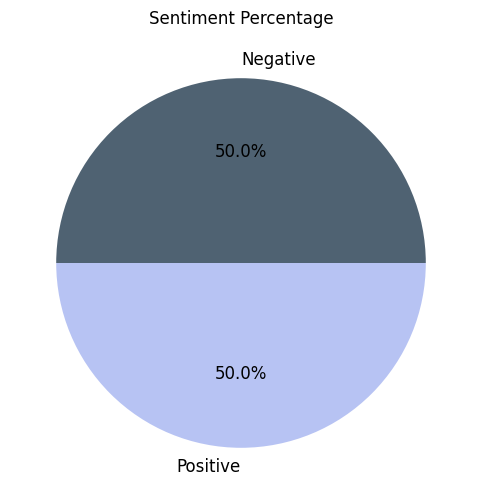

In [6]:
sentiment_percentage(Train, 'Sentiment', (6, 6))

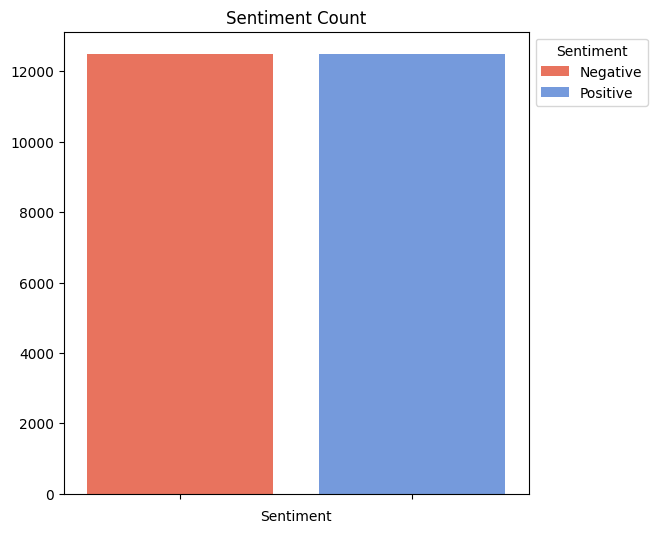

In [7]:
sentiment_counts(Train, 'Sentiment', (6, 6))

**2-Test Set**

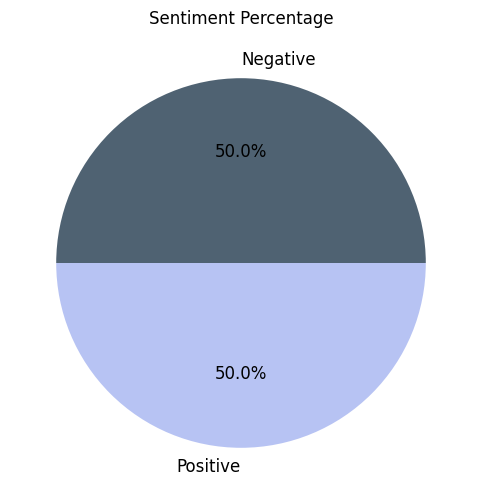

In [8]:
sentiment_percentage(Test, 'Sentiment', (6, 6))

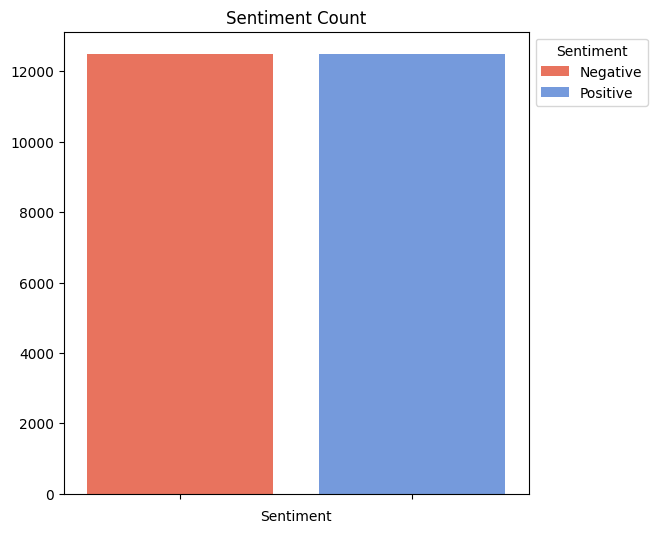

In [9]:
sentiment_counts(Test, 'Sentiment', (6, 6))

# Number Of Sentences

**1-Train**

In [10]:
Train['NumberOfSentences'] = Train['Review'].apply(lambda n:len(sent_tokenize(n)))
Train.drop(Train[Train["NumberOfSentences"] == 0].index, inplace = True)


In [11]:
Train['NumberOfSentences'].sum()

271057

**2-Test**

In [12]:
Test['NumberOfSentences'] = Test['Review'].apply(lambda n:len(sent_tokenize(n)))
Test.drop(Test[Test["NumberOfSentences"] == 0].index, inplace = True)

In [13]:
Test['NumberOfSentences'].sum()

266015

# Average Number Of Sentences

**1-Train Set**

In [14]:
AverageNumberOfSentence_Train = int(np.round(Train["NumberOfSentences"].mean()))
AverageNumberOfSentence_Train

11

**2-Test Set**

In [15]:
AverageNumberOfSentence_Test = int(np.round(Test["NumberOfSentences"].mean()))
AverageNumberOfSentence_Test

11

# Maximum Number Of Sentences

**1-Train Set**

In [16]:
MaximumNumberOfSentence_Train = Train["NumberOfSentences"].max()
MaximumNumberOfSentence_Train

282

**2-Test Set**

In [17]:
MaximumNumberOfSentence_Test = Test["NumberOfSentences"].max()
MaximumNumberOfSentence_Test

84

# Minimum Number Of Sentences

**1-Train Set**

In [18]:
MinimumNumberOfSentence_Train = Train["NumberOfSentences"].min()
MinimumNumberOfSentence_Train

1

**2-Test Set**

In [19]:
MinimumNumberOfSentence_Test = Test["NumberOfSentences"].min()
MinimumNumberOfSentence_Test

1

# Text Normalization

In [20]:
text_normalization = TextNormalization(_string_lower = True, 
                        _remove_emojis = True, 
                        _remove_hashtags = True, 
                        _remove_emails = True,
                        _remove_url = True, 
                        _remove_mention = True, 
                        _remove_duplicate_char = True,
                        _remove_single_char = True, 
                        _remove_new_line_char = True, 
                        _remove_number = True, 
                        _remove_html_tags = True, 
                        _remove_special_character = True, 
                        _remove_longest_than = True, 
                        _remove_whitespace = True, 
                        _remove_unicode_characters = True,
                        _stemmer = False, 
                        _remove_non_english = True, 
                        _remove_stop_words = True, 
                        _lemmatizer = False)

**1-Train Set**

In [21]:
Train['Normalized_Review'] = Train['Review'].apply(lambda x: text_normalization.normalization(x))
Train

,Review,Sentiment,NumberOfSentences,Normalized_Review
0,"Now, I won't deny that when I purchased this o...",Negative,8,deny purchased ebay high expectations incredib...
1,"The saddest thing about this ""tribute"" is that...",Negative,7,saddest tribute singers including incredibly t...
2,Last night I decided to watch the prequel or s...,Negative,6,last night decided watch prequel say called pr...
3,I have to admit that i liked the first half of...,Negative,13,admit liked first half sleepers looked acting ...
4,I was not impressed about this film especially...,Negative,5,impressed film especially went cinema family f...
...,...,...,...,...
24995,"This film is fun, if your a person who likes a...",Positive,2,film fun person likes campy feature film means...
24996,After seeing this film I feel like I know just...,Positive,7,seeing film feel like know little bit usa davi...
24997,first this deserves about 5 stars due to actin...,Negative,20,first deserves stars due acting give subjectiv...
24998,If you like films that ramble with little plot...,Negative,12,like films ramble little plot exposition spice...


**2-Test Set**

In [22]:
Test['Normalized_Review'] = Test['Review'].apply(lambda x: text_normalization.normalization(x))
Test

,Review,Sentiment,NumberOfSentences,Normalized_Review
0,"My daughter liked it but I was aghast, that a ...",Negative,12,daughter liked aghast character movie smokes a...
1,I... No words. No words can describe this. I w...,Negative,11,words words try sake brave people stick knives...
2,this film is basically a poor take on the old ...,Negative,9,film basically poor take old urban legend baby...
3,"This is a terrible movie, and I'm not even sur...",Negative,6,terrible movie sure terrible ugly trendy visua...
4,First of all this movie is a piece of reality ...,Positive,9,first movie piece reality well realized artist...
...,...,...,...,...
24995,"For one thing, he produced this movie. It has ...",Negative,10,produced movie feel later movies international...
24996,The title comes from an alteration an adolesce...,Positive,23,title comes alteration adolescent inmate corre...
24997,Christopher Nolan's first film is a 'no budget...,Positive,4,christopher nolan first film budget black whit...
24998,The story is shortly about the faith-lacking b...,Negative,11,story shortly faith lacking business man pries...


# Number Of Unique Words

**1-Train Set**

In [23]:
UniqueWords_Train = set()
for word in Train['Normalized_Review'].str.split():
    UniqueWords_Train.update(word)
len(UniqueWords_Train)

72431

**2-Test Set**

In [24]:
UniqueWords_Test = set()
for word in Test['Normalized_Review'].str.split():
    UniqueWords_Test.update(word)
len(UniqueWords_Test)

71484

# WordCloud

**1-Train Set**

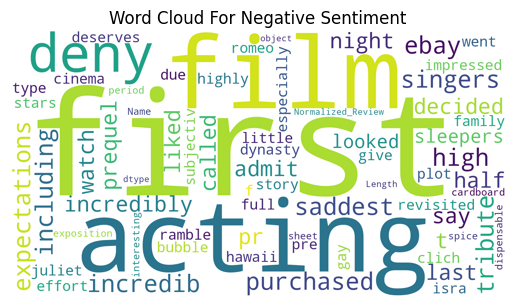

In [25]:
wordcloud(data=Train, target='Negative', width=1500, hieght=800, text='Normalized_Review')

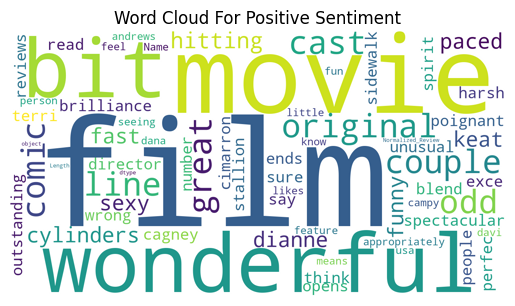

In [26]:
wordcloud(data=Train, target='Positive', width=1500, hieght=800, text='Normalized_Review')

**2-Test Set**

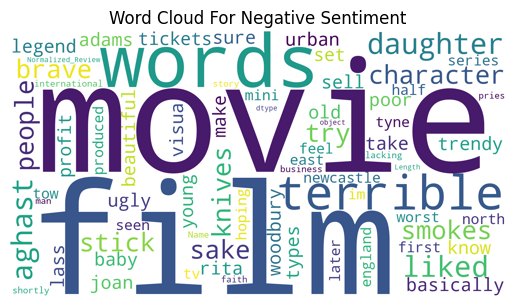

In [27]:
wordcloud(data=Test, target='Negative', width=1500, hieght=800, text='Normalized_Review')

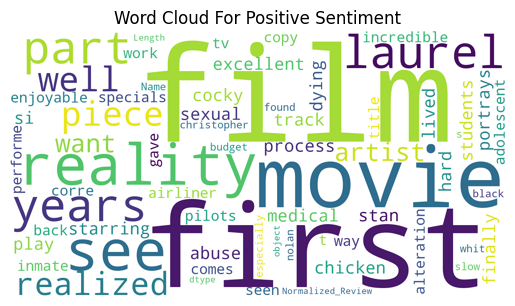

In [28]:
wordcloud(data=Test, target='Positive', width=1500, hieght=800, text='Normalized_Review')

# Most Frequent Words 

**1-Train Set**

In [29]:
MostFrequentWord_Train = Counter((Train['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF_Train = pd.DataFrame(MostFrequentWord_Train, columns=('Word', 'Count'))
MostFrequentWordDF_Train

,Word,Count
0,movie,44044
1,film,40161
2,like,20280
3,time,12726
4,story,11990
5,see,11479
6,well,10669
7,bad,9308
8,people,9287
9,first,9064


In [30]:
go_figure(data=MostFrequentWordDF_Train)

In [31]:
bar_plot(data=MostFrequentWordDF_Train)

**2-Test Set**

In [32]:
MostFrequentWord_Test = Counter((Test['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF_Test = pd.DataFrame(MostFrequentWord_Test, columns=('Word', 'Count'))
MostFrequentWordDF_Test

,Word,Count
0,movie,43926
1,film,39543
2,like,19891
3,time,12383
4,see,11550
5,story,11131
6,well,10601
7,bad,9164
8,great,9084
9,people,8900


In [33]:
go_figure(data=MostFrequentWordDF_Test)

In [34]:
bar_plot(data=MostFrequentWordDF_Test)

# Number Of Words 

**1-Train Set**

In [35]:
Train["Number of Words"] = Train["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Train.drop(Train[Train["Number of Words"] == 0].index, inplace = True)
Train["Number of Words"].sum()

2595456

**2-Test Set**

In [36]:
Test["Number of Words"] = Test["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Test.drop(Train[Test["Number of Words"] == 0].index, inplace = True)
Test["Number of Words"].sum()

2533983

# Number Of Charachters 

**1-Train Test**

In [37]:
Train["Number of Charachters"] = Train["Normalized_Review"].str.len()
Train["Number of Charachters"].sum()

18227157

**2-Test Set**

In [38]:
Test["Number of Charachters"] = Test["Normalized_Review"].str.len()
Test["Number of Charachters"].sum()

17776387

# Average Number Of Words 

**1-Train Set**

In [39]:
AverageNaumberOfWords_Train = int(np.round((Train["Number of Words"].mean())))
AverageNaumberOfWords_Train

104

**2-Test Set**

In [40]:
AverageNaumberOfWords_Test = int(np.round((Test["Number of Words"].mean())))
AverageNaumberOfWords_Test

101

# Average Number Of Charachters 

**1-Train Set**

In [41]:
AverageNumberOfCharachters_Train = int(np.round(Train["Number of Charachters"].mean()))
AverageNumberOfCharachters_Train

729

**2-Test Set**

In [42]:
AverageNumberOfCharachters_Test = int(np.round(Test["Number of Charachters"].mean()))
AverageNumberOfCharachters_Test

711

# Maximum Number Of Word

**1-Train Set**

In [43]:
MaximumNaumberOfWords_Train = Train["Number of Words"].max()
MaximumNaumberOfWords_Train

1275

**2-Test Set**

In [44]:
MaximumNaumberOfWords_Test = Test["Number of Words"].max()
MaximumNaumberOfWords_Test

1004

# Maximum Number Of Charachters 

**1-Train Set**

In [45]:
MaximumNumberOfCharachters_Train = Train['Number of Charachters'].max() 
MaximumNumberOfCharachters_Train

8424

**2-Test Set**

In [46]:
MaximumNumberOfCharachters_Test = Test['Number of Charachters'].max() 
MaximumNumberOfCharachters_Test

7531

# Minimum Number Of Words

**1-Train Set**

In [47]:
MimimumNaumberOfWords_Train = Train["Number of Words"].min()
MimimumNaumberOfWords_Train

3

**2-Test Set**

In [48]:
MimimumNaumberOfWords_Test = Test["Number of Words"].min()
MimimumNaumberOfWords_Test

3

# Minimum Number Of Charachters 

**1-Train Set**

In [49]:
MinimumNumberOfCharachters_Train = Train['Number of Charachters'].min() 
MinimumNumberOfCharachters_Train

22

**2-Test Set**

In [50]:
MinimumNumberOfCharachters_Test = Test['Number of Charachters'].min() 
MinimumNumberOfCharachters_Test

17

# Split The Dataset Into Training And Testing

In [51]:
X_train, X_test, y_train, y_test = Train['Normalized_Review'], Test['Normalized_Review'], Train['Sentiment'], Test['Sentiment']

# Encoding Dependent Variables (Y) Into Integer

In [52]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# CountVectorizer

In [53]:
CountVectorizer_ = CountVectorizer()
X_train_CV_ = CountVectorizer_.fit_transform(X_train)
X_test_CV_ = CountVectorizer_.transform(X_test)

In [54]:
Voc = CountVectorizer_.vocabulary_
Voc

{'deny': 16216,
 'purchased': 50608,
 'ebay': 19374,
 'high': 29266,
 'expectations': 21652,
 'incredible': 31549,
 'print': 49723,
 'work': 71271,
 'master': 39479,
 'comedy': 12168,
 'enjoy': 20468,
 'soon': 59582,
 'disappointed': 17255,
 'apologies': 2632,
 'enjoyed': 20472,
 'found': 24193,
 'compleat': 12435,
 'al': 1328,
 'difficult': 16963,
 'watch': 69952,
 'smiles': 58982,
 'sure': 62443,
 'majority': 38623,
 'funny': 24852,
 'came': 8982,
 'music': 42696,
 'videos': 69023,
 'dvd': 19169,
 'rest': 53259,
 'basically': 4924,
 'filler': 23014,
 'tell': 63781,
 'greatest': 26972,
 'video': 69012,
 'achievement': 423,
 'honor': 29867,
 'goes': 26384,
 'uhf': 66681,
 'honestly': 29842,
 'doubt': 18400,
 'jump': 34007,
 'ultra': 66727,
 'hardcore': 28217,
 'fan': 22204,
 'buy': 8657,
 'tape': 63367,
 'pay': 46873,
 'saddest': 55000,
 'tribute': 65899,
 'singers': 58269,
 'including': 31463,
 'incredibly': 31551,
 'talented': 63204,
 'nick': 43701,
 'cave': 9867,
 'missed': 41365,
 

# Machine Learning

**1-Naive Bayes**

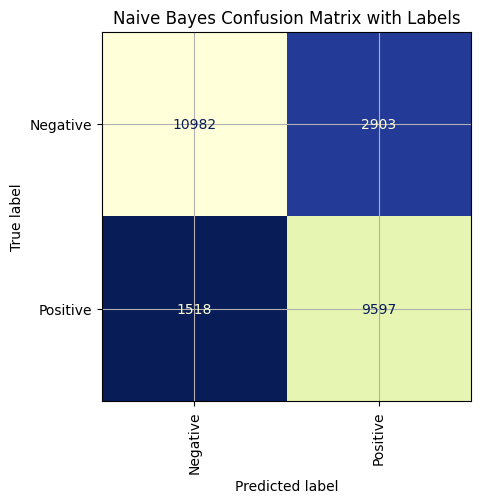

In [55]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Naive_Bayes, X_test=X_test_CV_, y_test=y_test, name='Naive Bayes')

In [56]:
metrics_values(model= Naive_Bayes, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.823160
Precision,0.827177
Recall,0.823160
F1Score,0.822616
Error,0.176840


**2-Logistic Regression**

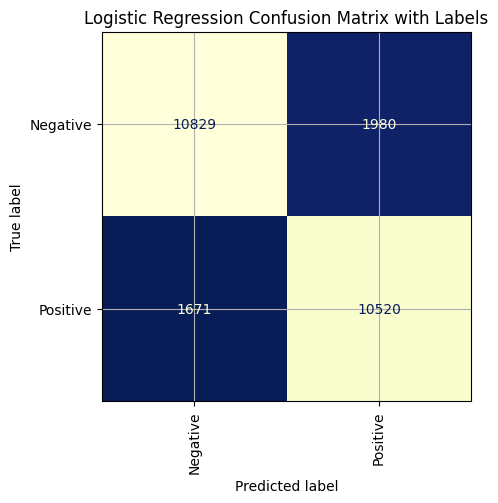

In [57]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(Logistic_Regression, X_test=X_test_CV_, y_test=y_test, name='Logistic Regression')

In [58]:
metrics_values(model= Logistic_Regression, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.853960
Precision,0.854176
Recall,0.853960
F1Score,0.853938
Error,0.146040


**3-Decision Tree**

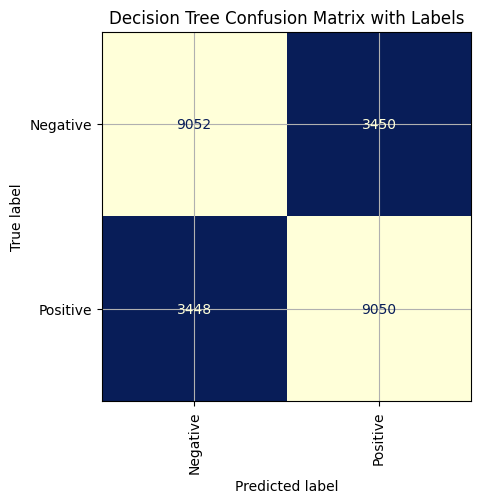

In [59]:
Algorithm = DecisionTreeClassifier(criterion='gini')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Decision_Tree, X_test=X_test_CV_, y_test=y_test, name='Decision Tree')

In [60]:
metrics_values(model= Decision_Tree, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.72408
Precision,0.72408
Recall,0.72408
F1Score,0.72408
Error,0.27592


**4-K Nearest Neighbors**

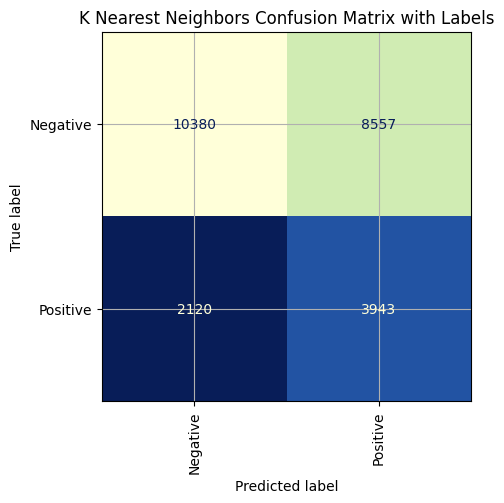

In [61]:
Algorithm =KNeighborsClassifier(metric='manhattan', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test, name='K Nearest Neighbors')

In [62]:
metrics_values(model= K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.572920
Precision,0.599236
Recall,0.572920
F1Score,0.542596
Error,0.427080


**5-Random Forest**

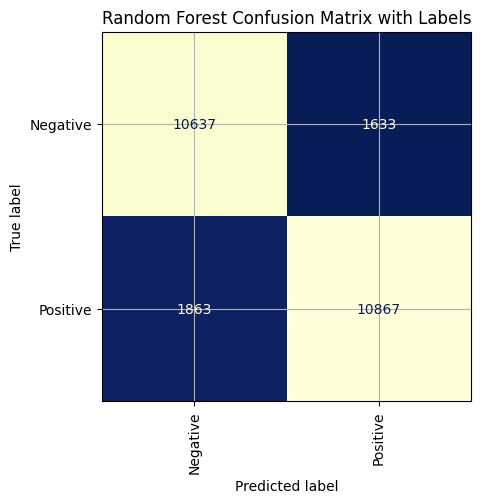

In [63]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=200)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Random_Forest, X_test=X_test_CV_, y_test=y_test, name='Random Forest')

In [64]:
metrics_values(model= Random_Forest, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.860160
Precision,0.860282
Recall,0.860160
F1Score,0.860148
Error,0.139840


**6-SGD Classifier**

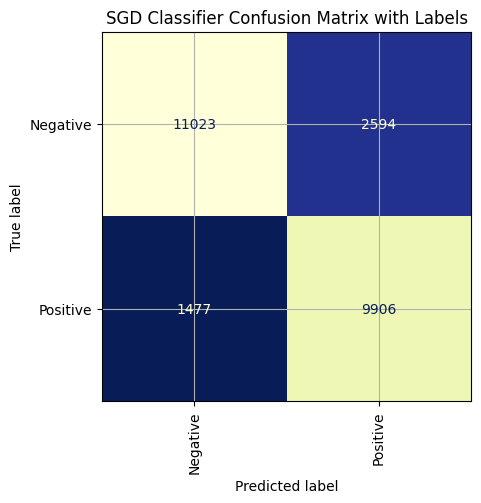

In [65]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=SGD, X_test=X_test_CV_, y_test=y_test, name='SGD Classifier')

In [66]:
metrics_values(model= SGD, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.837160
Precision,0.839874
Recall,0.837160
F1Score,0.836834
Error,0.162840


**7-Multilayer Perceptron**

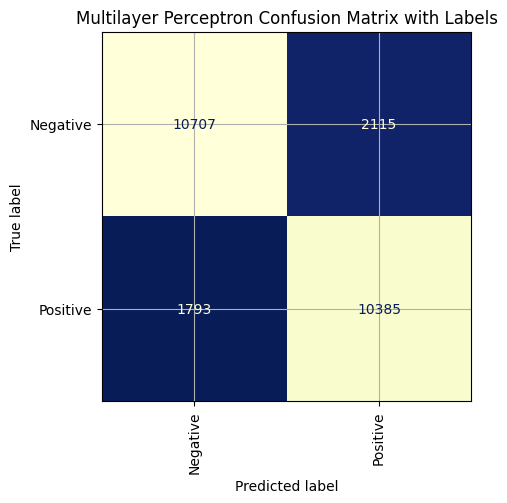

In [67]:
Algorithm = MLPClassifier(hidden_layer_sizes=100)
MLP = machine_learning_model(algorithm=Algorithm)
fit_model(model=MLP, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=MLP, X_test=X_test_CV_, y_test=y_test, name='Multilayer Perceptron')

In [68]:
metrics_values(model= MLP, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.843680
Precision,0.843908
Recall,0.843680
F1Score,0.843654
Error,0.156320


# Deep Learning

In [69]:
embedding_dim = 64
vocab_size, max_length, encoded_X_train , encoded_X_test = deeplearning_preprcosesing_(X_train=X_train, X_test=X_test,  truncating='pre', padding='pre')

In [70]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 72432

The Max Length Is : 1275


In [71]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    patience=3
                )

**8-Convolutional Neural Network**

Epoch 1/10
782/782 [==============================] - 210s 267ms/step - loss: 0.5237 - accuracy: 0.7287 - val_loss: 0.3130 - val_accuracy: 0.8780
Epoch 2/10
782/782 [==============================] - 186s 238ms/step - loss: 0.2418 - accuracy: 0.9128 - val_loss: 0.2984 - val_accuracy: 0.8834
Epoch 3/10
782/782 [==============================] - 175s 223ms/step - loss: 0.1584 - accuracy: 0.9463 - val_loss: 0.3363 - val_accuracy: 0.8753
Epoch 4/10
782/782 [==============================] - 164s 210ms/step - loss: 0.1098 - accuracy: 0.9669 - val_loss: 0.4139 - val_accuracy: 0.8623
Epoch 5/10
782/782 [==============================] - 148s 190ms/step - loss: 0.0737 - accuracy: 0.9789 - val_loss: 0.4696 - val_accuracy: 0.8624
Epoch 6/10
782/782 [==============================] - 139s 178ms/step - loss: 0.0518 - accuracy: 0.9852 - val_loss: 0.5666 - val_accuracy: 0.8545
Epoch 7/10
782/782 [==============================] - 130s 166ms/step - loss: 0.0417 - accuracy: 0.9886 - val_loss: 0.6377 -

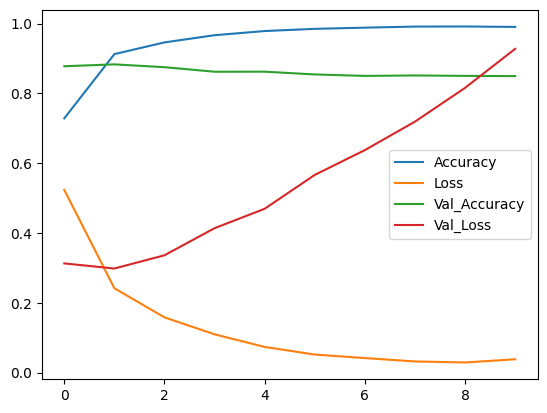

 
The Training Loss is 0.0049, And Training Accuracy is 0.9987
 
The Testing Loss is 0.9278, And Testing Accuracy is 0.8497


In [72]:
convolutional_neural_network = convolutional_neural_network_1d(vocab_size=vocab_size + 1, embedding_dim=embedding_dim, max_length=max_length, dropout=0.5, kernel=2, filters=32, strides=2, padding='same')
model_compile(model=convolutional_neural_network)
history = model_fit(model=convolutional_neural_network, X_train=encoded_X_train, y_train=y_train, epochs=10, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback, shuffle=True)
plot_accuracy_loss(histoty=history)
evaluate(model=convolutional_neural_network, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=convolutional_neural_network, x=encoded_X_test, y=y_test, train_test='Testing')

**9-LSTM**

Epoch 1/5
782/782 [==============================] - 138s 174ms/step - loss: 0.3625 - accuracy: 0.8415 - val_loss: 0.3219 - val_accuracy: 0.8641
Epoch 2/5
782/782 [==============================] - 136s 174ms/step - loss: 0.1511 - accuracy: 0.9466 - val_loss: 0.4177 - val_accuracy: 0.8510
Epoch 3/5
782/782 [==============================] - 128s 164ms/step - loss: 0.0715 - accuracy: 0.9754 - val_loss: 0.5036 - val_accuracy: 0.8414
Epoch 4/5
782/782 [==============================] - 129s 165ms/step - loss: 0.0814 - accuracy: 0.9693 - val_loss: 0.5238 - val_accuracy: 0.8340
Epoch 5/5
782/782 [==============================] - 125s 160ms/step - loss: 0.0274 - accuracy: 0.9922 - val_loss: 0.6849 - val_accuracy: 0.8350


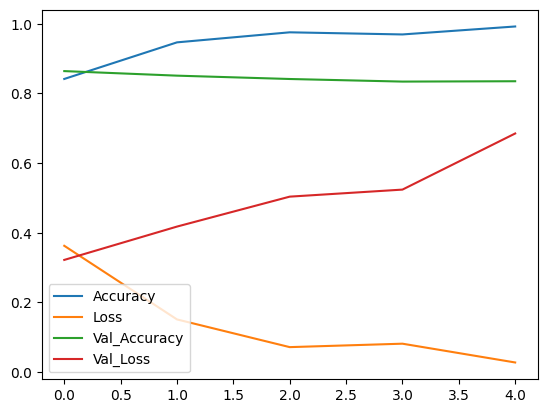

 
The Training Loss is 0.0090, And Training Accuracy is 0.9980
 
The Testing Loss is 0.6849, And Testing Accuracy is 0.8350


In [73]:
LSTM =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.2, units=64)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=y_train, epochs=5, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback, shuffle=True)
plot_accuracy_loss(histoty=history)
evaluate(model=LSTM, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=LSTM, x=encoded_X_test,y= y_test, train_test='Testing')

**10-GRU**

Epoch 1/5
782/782 [==============================] - 161s 201ms/step - loss: 0.3743 - accuracy: 0.8307 - val_loss: 0.3263 - val_accuracy: 0.8630
Epoch 2/5
782/782 [==============================] - 136s 174ms/step - loss: 0.1484 - accuracy: 0.9460 - val_loss: 0.3954 - val_accuracy: 0.8510
Epoch 3/5
782/782 [==============================] - 127s 162ms/step - loss: 0.0730 - accuracy: 0.9756 - val_loss: 0.5444 - val_accuracy: 0.8231
Epoch 4/5
782/782 [==============================] - 119s 152ms/step - loss: 0.0338 - accuracy: 0.9888 - val_loss: 0.5900 - val_accuracy: 0.8271
Epoch 5/5
782/782 [==============================] - 115s 147ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.6967 - val_accuracy: 0.8318


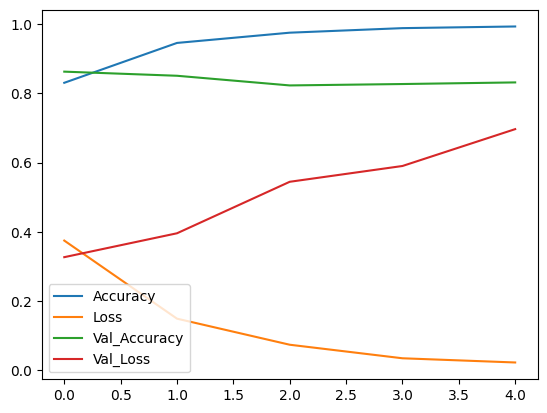

 
The Training Loss is 0.0082, And Training Accuracy is 0.9975
 
The Testing Loss is 0.6967, And Testing Accuracy is 0.8318


In [74]:
GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.2, units=64)
model_compile(model=GRU_)
history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=y_train, epochs=5, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback, shuffle=True)
plot_accuracy_loss(histoty=history)
evaluate(model=GRU_, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=GRU_, x=encoded_X_test,y= y_test, train_test='Testing')  

* In Future Work I Wiil Try To Decrease The Loss Values
* Using Transformer